In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df['credit.policy'].unique()

array([1, 0])

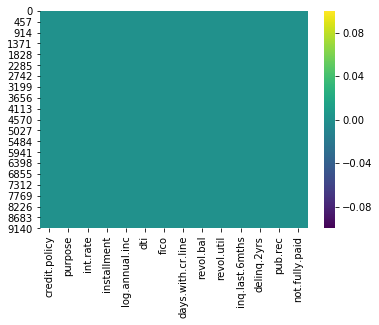

In [5]:
sns.heatmap(df.isnull(),cmap='viridis')

In [0]:
df.drop('purpose',axis=1,inplace=True)

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
X = df.drop('credit.policy',axis=1)
y = df['credit.policy']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
svm = SVC()

In [11]:
svm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction = svm.predict(X_test)

In [13]:
print(accuracy_score(y_test,prediction))

0.8082811412665275


In [14]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       551
           1       0.81      1.00      0.89      2323

    accuracy                           0.81      2874
   macro avg       0.40      0.50      0.45      2874
weighted avg       0.65      0.81      0.72      2874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
#param_grid = {'C':[0.1,10,100],'gamma':[0.1,0.01],'kernel':['poly','rbf'],'degree':[1,2,3,4]}
param_grid = {'C':[0.001,1000],'gamma':[0.0001,1],'kernel':['poly','rbf']}

In [0]:
Newgrid = GridSearchCV(SVC(),param_grid,verbose=3)

In [19]:
Newgrid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
Newgrid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [0]:
Prediction1 = Newgrid.predict(X_test)

In [23]:
print(accuracy_score(y_test,Prediction1))

0.8082811412665275


In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       551
           1       0.81      1.00      0.89      2323

    accuracy                           0.81      2874
   macro avg       0.40      0.50      0.45      2874
weighted avg       0.65      0.81      0.72      2874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
